### Importing the modules

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

### Reading and printing the data

In [4]:
product_sales = pd.read_csv('product_sales.csv')
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


### Getting the info

In [5]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


### Changing datatype

In [6]:
product_sales['week'] = product_sales['week'].astype('int32')
product_sales['sales_method'] = product_sales['sales_method'].astype('object')
product_sales['nb_sold'] = product_sales['nb_sold'].astype('int32')
product_sales['revenue'] = product_sales['revenue'].astype('float32')
product_sales['years_as_customer'] = product_sales['years_as_customer'].astype('int32')
product_sales['nb_site_visits'] = product_sales['nb_site_visits'].astype('int32')
product_sales['state'] = product_sales['state'].astype('category')

In [7]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int32   
 1   sales_method       15000 non-null  object  
 2   customer_id        15000 non-null  object  
 3   nb_sold            15000 non-null  int32   
 4   revenue            13926 non-null  float32 
 5   years_as_customer  15000 non-null  int32   
 6   nb_site_visits     15000 non-null  int32   
 7   state              15000 non-null  category
dtypes: category(1), float32(1), int32(4), object(2)
memory usage: 544.6+ KB


## Knowing the data

In [8]:
product_sales.duplicated().sum()

np.int64(0)

### Dealing with null values

In [9]:
product_sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [10]:
mean_values = product_sales['revenue'].mean()
mean_values

np.float32(93.934944)

In [11]:
product_sales.fillna({'revenue': mean_values}, inplace=True)

In [23]:
# product_sales['revenue'] = product_sales['revenue'].method(mean_values) 

In [12]:
product_sales.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

### Standardizing the data

In [13]:
product_sales['sales_method'].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [14]:
product_sales['sales_method'] = product_sales['sales_method'].str.lower()
product_sales['sales_method'] = product_sales['sales_method'].replace({'em + call':'email + call'})

In [15]:
product_sales['sales_method'].value_counts()

sales_method
email           7466
call            4962
email + call    2572
Name: count, dtype: int64

### Removing letters and other characters

In [16]:
product_sales.head(2)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,93.934944,0,24,Arizona
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.470001,1,28,Kansas


### Striping characters 

In [17]:
# Removing special characters 
product_sales['customer_id'] = product_sales['customer_id'].str.replace(r'\D+', '', regex=True)

# Striping customer_id to have only ten unique numbers
product_sales['customer_id'] = product_sales['customer_id'].apply(lambda x: x[0:11]) # I will use this

In [ ]:
# Striping customer_id to  have only ten unique id numbers (negative slicing)
# product_sales['customer_id'] = product_sales['customer_id'].apply(lambda x: x[-11:-1]) # I will use this

# Striping customer_id to have only ten unique id numbers (positive slicing)
# product_sales['customer_id'] = product_sales['customer_id'].apply(lambda x: x[0:11]) # I will use this

### Changing customer_id datatype

In [18]:
product_sales['customer_id'] = product_sales['customer_id'].astype('int')

In [19]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int32   
 1   sales_method       15000 non-null  object  
 2   customer_id        15000 non-null  int64   
 3   nb_sold            15000 non-null  int32   
 4   revenue            15000 non-null  float32 
 5   years_as_customer  15000 non-null  int32   
 6   nb_site_visits     15000 non-null  int32   
 7   state              15000 non-null  category
dtypes: category(1), float32(1), int32(4), int64(1), object(1)
memory usage: 544.6+ KB


In [20]:
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,email,27264195497,10,93.934944,0,24,Arizona
1,6,email + call,39989870544,15,225.470001,1,28,Kansas
2,5,call,19884805940,11,52.549999,6,26,Wisconsin
3,4,email,78754481710,11,93.934944,3,25,Indiana
4,3,email,10644610542,9,90.489998,0,28,Illinois


In [21]:
product_sales['customer_id'].duplicated().sum()

np.int64(0)

In [22]:
product_sales['customer_id'].value_counts()

customer_id
40772357174    1
27264195497    1
39989870544    1
19884805940    1
78754481710    1
              ..
269112408      1
20049478868    1
40260287429    1
56491749065    1
77158676440    1
Name: count, Length: 15000, dtype: int64

## Data validation:
- Describe validation and cleaning steps for every column in the data#

In [2]:
df = pd.read_csv('product_sales.csv')
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


### Getting the info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


### Changing datatype

In [4]:
df['week'] = df['week'].astype('int32')
df['sales_method'] = df['sales_method'].astype('object')
df['nb_sold'] = df['nb_sold'].astype('int32')
df['revenue'] = df['revenue'].astype('float32')
df['years_as_customer'] = df['years_as_customer'].astype('int32')
df['nb_site_visits'] = df['nb_site_visits'].astype('int32')
df['state'] = df['state'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int32   
 1   sales_method       15000 non-null  object  
 2   customer_id        15000 non-null  object  
 3   nb_sold            15000 non-null  int32   
 4   revenue            13926 non-null  float32 
 5   years_as_customer  15000 non-null  int32   
 6   nb_site_visits     15000 non-null  int32   
 7   state              15000 non-null  category
dtypes: category(1), float32(1), int32(4), object(2)
memory usage: 544.6+ KB


### Dealing with null values

In [6]:
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

### Dropping missing values 

In [7]:
df.dropna(subset =['revenue'], axis=0, inplace=True)

In [8]:
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

### Standardizing the data

In [9]:
df['sales_method'].value_counts()

sales_method
Email           6915
Call            4781
Email + Call    2203
em + call         20
email              7
Name: count, dtype: int64

In [10]:
# Standardizing and validating the data
df['sales_method'] = df['sales_method'].str.lower()
df['sales_method'] = df['sales_method'].replace({'em + call':'email + call'})

In [11]:
df['sales_method'].value_counts()

sales_method
email           6922
call            4781
email + call    2223
Name: count, dtype: int64

In [12]:
df.head(3)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.470001,1,28,Kansas
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.549999,6,26,Wisconsin
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.489998,0,28,Illinois


### Removing letters and other characters

In [13]:
# Removing special characters 
df['customer_id'] = df['customer_id'].str.replace(r'\D+', '', regex=True)

# Getting the customer_id column right and with unique identifier
df['customer_id'] = df['customer_id'].apply(lambda x: x[-11:-1])
df.head(2)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,email + call,4794278982,15,225.470001,1,28,Kansas
2,5,call,6510865744,11,52.549999,6,26,Wisconsin


In [14]:
df['customer_id'].duplicated().sum()

np.int64(0)

In [15]:
df['customer_id'].value_counts()

customer_id
4078332001    1
4794278982    1
6510865744    1
0154387092    1
2448090920    1
             ..
4086938781    1
6831089054    1
7429131959    1
5182301103    1
6440878842    1
Name: count, Length: 13926, dtype: int64

In [55]:
# df['customer_id'] = df['customer_id'].apply(lambda x: x[0:11]) # I will use this to test

In [16]:
# Changing dtype of customer_id
df['customer_id'] = df['customer_id'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               13926 non-null  int32   
 1   sales_method       13926 non-null  object  
 2   customer_id        13926 non-null  int64   
 3   nb_sold            13926 non-null  int32   
 4   revenue            13926 non-null  float32 
 5   years_as_customer  13926 non-null  int32   
 6   nb_site_visits     13926 non-null  int32   
 7   state              13926 non-null  category
dtypes: category(1), float32(1), int32(4), int64(1), object(1)
memory usage: 614.4+ KB


## Exploratory Analysis:
- Include two different graphics showing single variables only to demonstrate the characteristics of data
- Include at least one graphic showing two or more variables to represent the relationship between features
- Describe your findings

In [18]:
df.head(1)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,email + call,4794278982,15,225.470001,1,28,Kansas


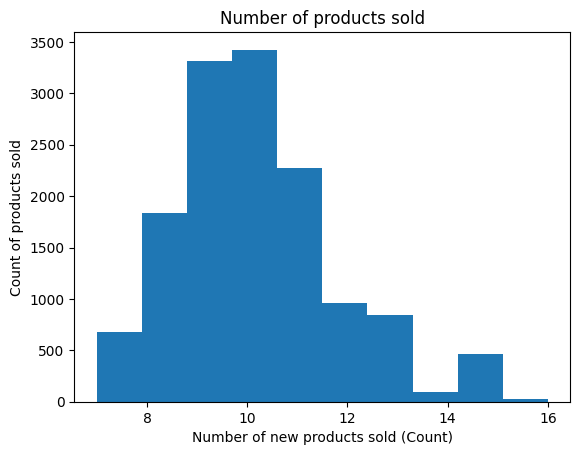

In [40]:
plt.hist(df['nb_sold'])
plt.title('Number of products sold')
plt.ylabel('Count of products sold')
plt.xlabel('Number of new products sold (Count)')
plt.show()

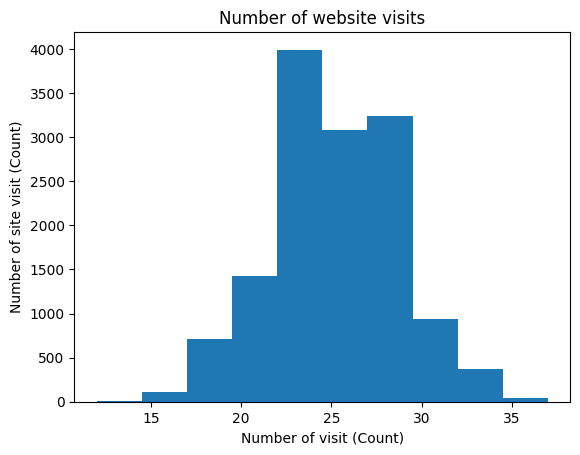

In [41]:
plt.hist(df['nb_site_visits'])
plt.title('Number of website visits')
plt.ylabel('Number of site visit (Count)')
plt.xlabel('Number of visit (Count)')
plt.show()

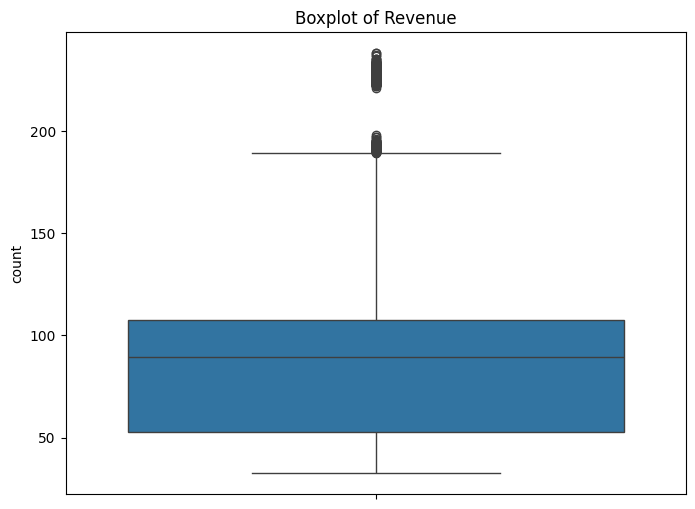

In [42]:
# 3. Boxplot (for numerical data to show outliers and quartiles)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['revenue'])
plt.title('Boxplot of Revenue')
plt.ylabel('count')
plt.show()

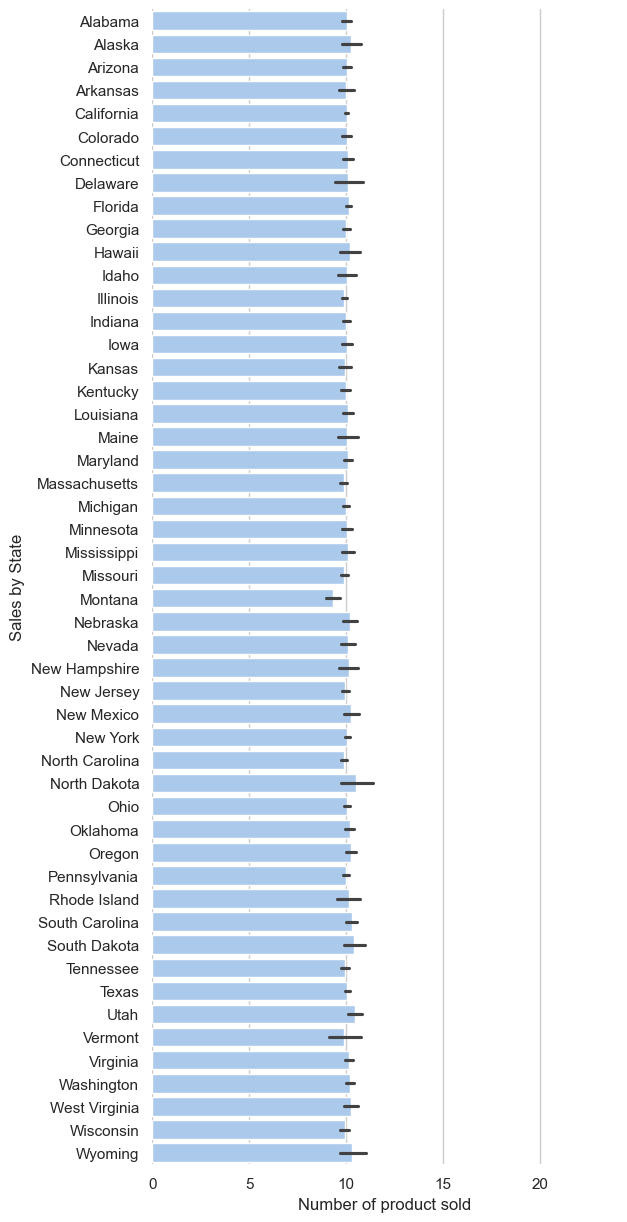

In [43]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="nb_sold", y="state", data=df,
            color="b")


ax.set(xlim=(0, 24), ylabel="Sales by State",
       xlabel="Number of product sold")
sns.despine(left=True, bottom=True)

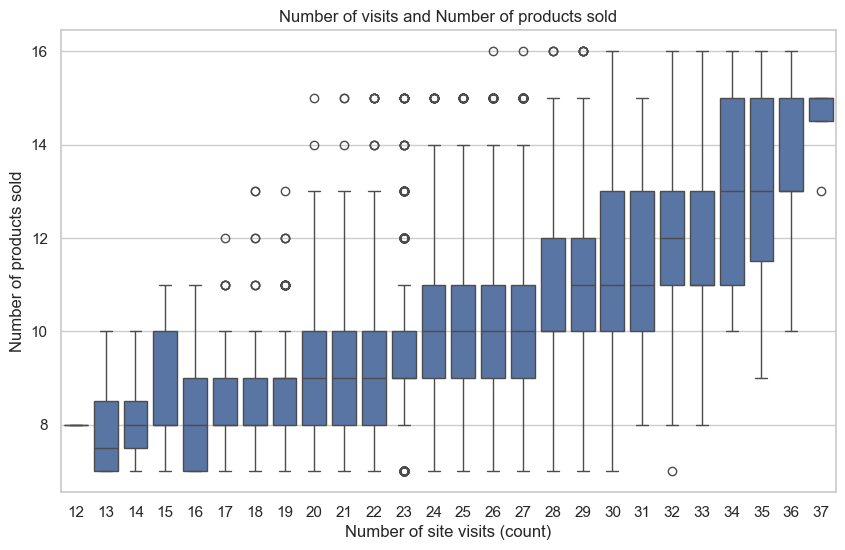

In [44]:
# Example 2: Box plot (categorical vs. numerical)
plt.figure(figsize=(10, 6))
sns.boxplot(x='nb_site_visits', y='nb_sold', data=df)
plt.title('Number of visits and Number of products sold')
plt.xlabel('Number of site visits (count)')
plt.ylabel('Number of products sold')
plt.show()

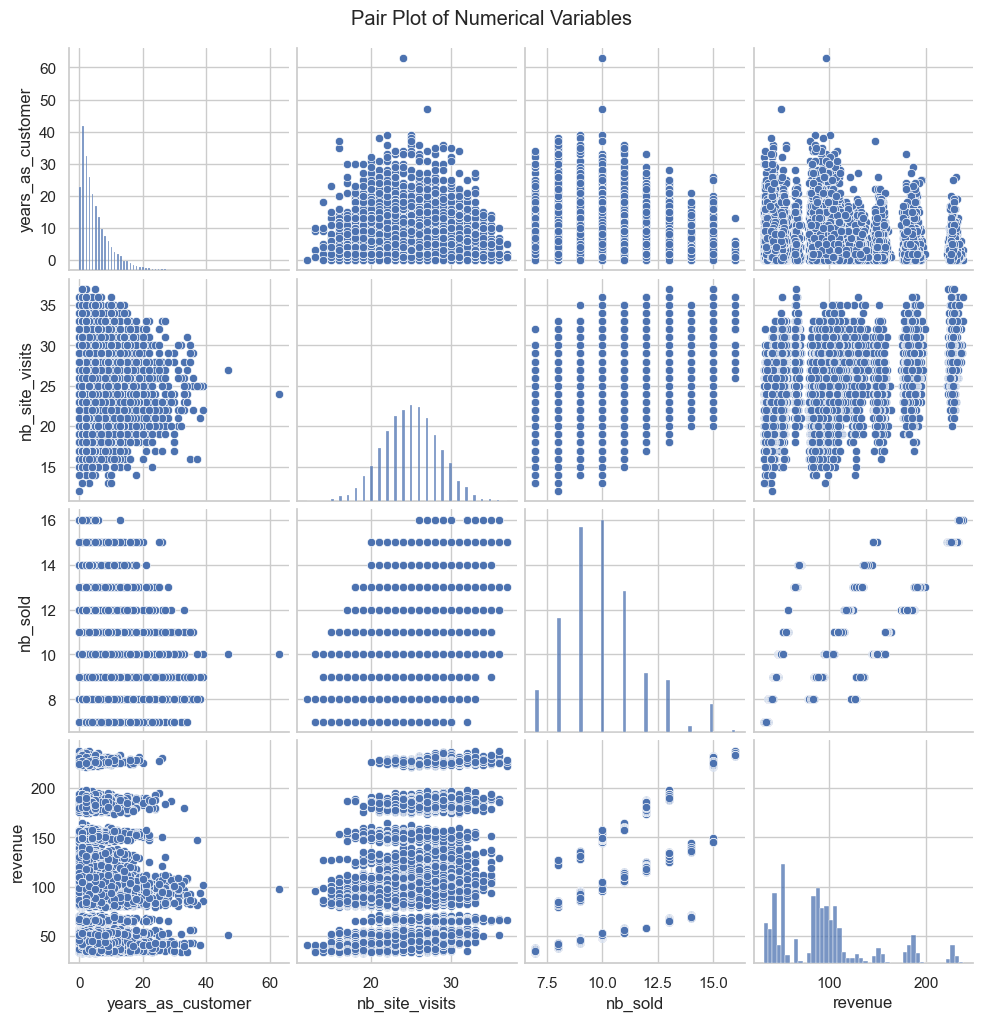

In [45]:
# Example 3: Pair plot (multiple numerical variables)
sns.pairplot(df[['years_as_customer', 'nb_site_visits', 'nb_sold', 'revenue']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)  # Adjust title position
plt.show()

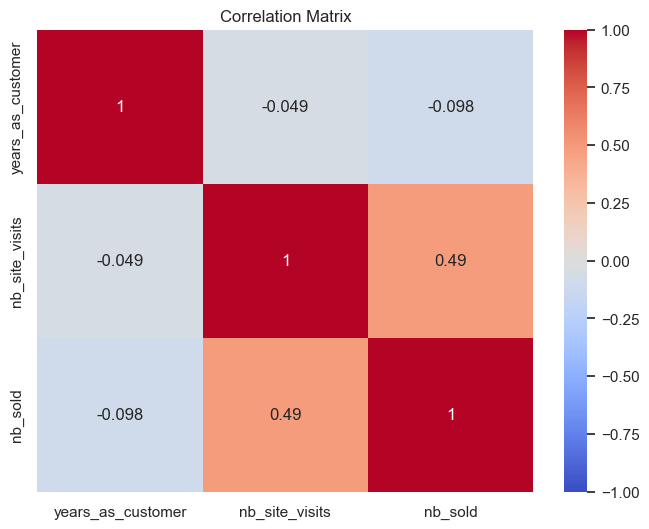

In [46]:
# Example 4: Heatmap (correlation matrix)
correlation_matrix = df[['years_as_customer', 'nb_site_visits', 'nb_sold']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Definition of a metric for the business to monitor
- How should the business use the metric to monitor the business problem
- Can you estimate initial value(s) for the metric based on the current data
#### Final summary including recommendations that the business should undertake